## Feature Selection & Encoding - Variance Threshold Approach to Dimensionality Reduction

In [1]:
# This notebook is applicable to both Scenario C at 0.10 variance tolerance 
# and for Scenario D at 0.20 variance tolerance.
# To change code to run for 0.20, two changes need to be made in Variance
# Threshold section - one in Thresholder cell and one in plot cell.

In [2]:
# Import the libraries needed

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [3]:
# ******************************************************
# TWO CHANGES NEED TO BE MADE TO THIS NOTEBOOK IF 'RACE'
# ATTRIBUTE IS INCLUDED
# ******************************************************

In [4]:
# Read in the dataset passed from the last module

data = pd.read_csv('Mod_2_data_to_pass.csv')

In [5]:
# Checking data types before proceeding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99343 entries, 0 to 99342
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    99343 non-null  object
 1   age                       99343 non-null  object
 2   admission_type_id         99343 non-null  object
 3   discharge_disposition_id  99343 non-null  int64 
 4   time_in_hospital          99343 non-null  int64 
 5   num_lab_procedures        99343 non-null  int64 
 6   num_procedures            99343 non-null  int64 
 7   num_medications           99343 non-null  int64 
 8   number_outpatient         99343 non-null  int64 
 9   number_emergency          99343 non-null  int64 
 10  number_inpatient          99343 non-null  int64 
 11  diag_1                    99323 non-null  object
 12  diag_2                    98987 non-null  object
 13  diag_3                    97924 non-null  object
 14  number_diagnoses      

In [6]:
# Change data types to categories

cat_list = ['gender', 'age', 'admission_type_id', 'discharge_disposition_id',
            'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'change',
           'diabetesMed', 'readmitted', 'Meglitinides', 'Thiazolidinediones',
           'Sulfonylureas', 'AG_Inhibitors', 'Metformin', 'Insulin', 'Admission_Source']

#cat_list.append('race')

for item in cat_list:
    data[item] = data[item].astype('category')



In [7]:
# Confirming data types have been changed to categorical
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99343 entries, 0 to 99342
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   gender                    99343 non-null  category
 1   age                       99343 non-null  category
 2   admission_type_id         99343 non-null  category
 3   discharge_disposition_id  99343 non-null  category
 4   time_in_hospital          99343 non-null  int64   
 5   num_lab_procedures        99343 non-null  int64   
 6   num_procedures            99343 non-null  int64   
 7   num_medications           99343 non-null  int64   
 8   number_outpatient         99343 non-null  int64   
 9   number_emergency          99343 non-null  int64   
 10  number_inpatient          99343 non-null  int64   
 11  diag_1                    99323 non-null  category
 12  diag_2                    98987 non-null  category
 13  diag_3                    97924 non-null  cate

In [8]:
# Three attributes contain NaN data so they need to be removed from the dataset
# Remove diag_1, diag_2 and diag_3 due to NaN
data = data.drop('diag_1', axis = 1)
data = data.drop('diag_2', axis = 1)
data = data.drop('diag_3', axis = 1)

## One Hot Encoding

In [9]:
# APPROACH 1
# USING OneHotEncoder TO GENERATE DUMMY VARIABLES
# ONE HOT ENCODING IN A LOOP TO BINARIZE CATEGORICAL ATTRIBUTES

'''
# Create one hot encoder (start the tool)
# ?? Don't understand what 'sparse_output = False' does
encoder = OneHotEncoder(sparse_output = False, dtype = np.int)

# Create a new dataframe to store the one-hot encoded data
encoded_dataframes = []

# Create a list of all the categorical columns to be one-hot encoded
cat_columns = ['gender', 'age', 'admission_type_id',
               'discharge_disposition_id', 'max_glu_serum', 'A1Cresult',
               'Meglitinides', 'Thiazolidinediones', 'Sulfonylureas',
               'AG_Inhibitors', 'Metformin', 'Insulin', 'change',
               'diabetesMed', 'Admission_Source']

#cat_columns.append('race')

for column in cat_columns:
    # Get data to be encoded from original dataset
    column_data = data[[column]]

    # Use the encoder
    encoded_data = encoder.fit_transform(column_data)

    # Create a temporary dataframe to hold encoded data
    temp_encoded_data = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out([column]))

    # Add the encoded dataframe to the list created above
    encoded_dataframes.append(temp_encoded_data)

# Concat all the encoded dataframes in the temp_encoded_data list
completed_dataframe = pd.concat(encoded_dataframes, axis = 1)

# Remove the original columns from test3
data_copy = data.copy()
data_copy = data_copy.drop(cat_columns, axis = 1)


# Put the remaining original data columns together with the encoded dataframe
data = pd.concat([data_copy, completed_dataframe], axis=1)

# Confirming binarizing was done correctly and verifying new number of attributes

display(data.info())

display(data)

'''

"\n# Create one hot encoder (start the tool)\n# ?? Don't understand what 'sparse_output = False' does\nencoder = OneHotEncoder(sparse_output = False, dtype = np.int)\n\n# Create a new dataframe to store the one-hot encoded data\nencoded_dataframes = []\n\n# Create a list of all the categorical columns to be one-hot encoded\ncat_columns = ['gender', 'age', 'admission_type_id',\n               'discharge_disposition_id', 'max_glu_serum', 'A1Cresult',\n               'Meglitinides', 'Thiazolidinediones', 'Sulfonylureas',\n               'AG_Inhibitors', 'Metformin', 'Insulin', 'change',\n               'diabetesMed', 'Admission_Source']\n\n#cat_columns.append('race')\n\nfor column in cat_columns:\n    # Get data to be encoded from original dataset\n    column_data = data[[column]]\n\n    # Use the encoder\n    encoded_data = encoder.fit_transform(column_data)\n\n    # Create a temporary dataframe to hold encoded data\n    temp_encoded_data = pd.DataFrame(encoded_data, columns = encoder.ge

In [10]:
# APPROACH 2
# USING GET_DUMMIES TO GENERATE DUMMY VARIABLES
# USING THE PACKAGE WITHOUT A LOOP TO BINARIZE CATEGORICAL ATTRIBUTES

# Create a list of all the categorical columns to be one-hot encoded
cat_columns = ['gender', 'age', 'admission_type_id',
               'discharge_disposition_id', 'max_glu_serum', 'A1Cresult',
               'Meglitinides', 'Thiazolidinediones', 'Sulfonylureas',
               'AG_Inhibitors', 'Metformin', 'Insulin', 'change',
               'diabetesMed', 'Admission_Source']

#cat_columns.append('race')

data = pd.get_dummies(data,columns=cat_columns, dtype = int)

# Confirming binarizing was done correctly and verifying new number of attributes

display(data.info())

display(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99343 entries, 0 to 99342
Data columns (total 76 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   time_in_hospital                 99343 non-null  int64   
 1   num_lab_procedures               99343 non-null  int64   
 2   num_procedures                   99343 non-null  int64   
 3   num_medications                  99343 non-null  int64   
 4   number_outpatient                99343 non-null  int64   
 5   number_emergency                 99343 non-null  int64   
 6   number_inpatient                 99343 non-null  int64   
 7   number_diagnoses                 99343 non-null  int64   
 8   readmitted                       99343 non-null  category
 9   gender_Female                    99343 non-null  int32   
 10  gender_Male                      99343 non-null  int32   
 11  gender_Missing                   99343 non-null  int32   
 12  age_

None

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,gender_Female,...,Insulin_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,Admission_Source_Emerg_Dept,Admission_Source_Missing,Admission_Source_Other,Admission_Source_Referral,Admission_Source_Transfer
0,1,41,0,1,0,0,0,1,NO,1,...,0,0,1,1,0,0,0,0,1,0
1,3,59,0,18,0,0,0,9,>30,1,...,0,1,0,0,1,1,0,0,0,0
2,2,11,5,13,2,0,1,6,NO,1,...,0,0,1,0,1,1,0,0,0,0
3,2,44,1,16,0,0,0,7,NO,0,...,0,1,0,0,1,1,0,0,0,0
4,1,51,0,8,0,0,0,5,NO,0,...,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99338,3,51,0,16,0,0,0,9,>30,0,...,0,1,0,0,1,1,0,0,0,0
99339,5,33,3,18,0,0,1,9,NO,1,...,1,0,1,0,1,0,0,0,0,1
99340,1,53,0,9,1,0,0,13,NO,0,...,0,1,0,0,1,1,0,0,0,0
99341,10,45,2,21,0,0,1,9,NO,1,...,0,1,0,0,1,1,0,0,0,0


## Feature Scaling of Quantitative Attributes

In [11]:
# Create a list of the quantitative attributes

quantList = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
             'num_medications', 'number_outpatient', 'number_emergency',
             'number_inpatient', 'number_diagnoses']

# Instantiate the StandardScaler tool
scaler = StandardScaler()

# Scaling the numerical attributes listed in quantList in the training
# set using the StandardScaler

data[quantList] = scaler.fit_transform(data[quantList])

In [12]:
# Confirming the data has been scaled in the training set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99343 entries, 0 to 99342
Data columns (total 76 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   time_in_hospital                 99343 non-null  float64 
 1   num_lab_procedures               99343 non-null  float64 
 2   num_procedures                   99343 non-null  float64 
 3   num_medications                  99343 non-null  float64 
 4   number_outpatient                99343 non-null  float64 
 5   number_emergency                 99343 non-null  float64 
 6   number_inpatient                 99343 non-null  float64 
 7   number_diagnoses                 99343 non-null  float64 
 8   readmitted                       99343 non-null  category
 9   gender_Female                    99343 non-null  int32   
 10  gender_Male                      99343 non-null  int32   
 11  gender_Missing                   99343 non-null  int32   
 12  age_

## Split Data into Train and Test Sets

In [13]:
# Select all the features except the target variable
X = data.drop('readmitted', axis = 1)
#print(X.info())

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, data['readmitted'], test_size = 0.2, random_state=53)

In [14]:
# Confirming the size of the training and test sets

print('X_train size\n', X_train.shape)

print('\nX_test size\n', X_test.shape)

X_train size
 (79474, 75)

X_test size
 (19869, 75)


## SMOTE

In [15]:
# Using SMOTE (Synthetic Minority Over-sampling TEchnique) to address the
# class imbalance problem.
# SMOTE generates synthetic rows for the minority class in the training set
smote = SMOTE()
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [16]:
# Checking the size of the y training dataset before SMOTE was applied
Y_train.info()

<class 'pandas.core.series.Series'>
Index: 79474 entries, 60411 to 56857
Series name: readmitted
Non-Null Count  Dtype   
--------------  -----   
79474 non-null  category
dtypes: category(1)
memory usage: 698.6 KB


In [17]:
# Checking the size of the y training dataset after SMOTE was applied
Y_train_resampled.info()

<class 'pandas.core.series.Series'>
RangeIndex: 125919 entries, 0 to 125918
Series name: readmitted
Non-Null Count   Dtype   
--------------   -----   
125919 non-null  category
dtypes: category(1)
memory usage: 123.2 KB


## Variance Threshold

In [18]:
# USING VARIANCE THRESHOLD TO ELIMINATE UNHELPFUL ATTRIBUTES

# Turn the VarianceThreshold tool on & specify the minimum
# variance threshold
# The lower the threshold, the more features will be
# considered for removal
selector = VarianceThreshold(threshold=0.1)

# Create high variance feature matrix
# Fit and transform the data
Xnew = selector.fit_transform(X_train_resampled)

# Get the indices of the features that were selected
selected_features_indices = selector.get_support(indices=True)

# Create a list of the attribute names
feature_names = X_train_resampled.columns

# Get the feature names with low variance
low_variance_features = [feature_names[i] for i in range(len(feature_names)) if i not in selected_features_indices]

# Print the low variance features
display("Low variance features to be dropped:", low_variance_features)
print("Number of features to be dropped: ", len(low_variance_features))

'Low variance features to be dropped:'

['gender_Missing',
 'age_[0-10)',
 'age_[10-20)',
 'age_[20-30)',
 'age_[30-40)',
 'age_[40-50)',
 'age_[90-100)',
 'admission_type_id_Missing',
 'admission_type_id_Trauma Centre',
 'discharge_disposition_id_2',
 'discharge_disposition_id_4',
 'discharge_disposition_id_5',
 'discharge_disposition_id_7',
 'discharge_disposition_id_8',
 'discharge_disposition_id_9',
 'discharge_disposition_id_12',
 'discharge_disposition_id_15',
 'discharge_disposition_id_16',
 'discharge_disposition_id_17',
 'discharge_disposition_id_22',
 'discharge_disposition_id_23',
 'discharge_disposition_id_24',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'discharge_disposition_id_999',
 'max_glu_serum_>200',
 'max_glu_serum_>300',
 'max_glu_serum_Norm',
 'A1Cresult_>7',
 'A1Cresult_>8',
 'A1Cresult_Norm',
 'Meglitinides_Adjusted',
 'Meglitinides_No',
 'Meglitinides_Steady',
 'Thiazolidinediones_No',
 'Thiazolidinediones_Steady',
 'Sulfonylureas_No',
 'Sulfonylureas_Steady',
 'AG_Inhibitors_Ad

Number of features to be dropped:  46


In [19]:
# Make changes to X_train_resampled dataset
# Drop low variance features from dataset
X_train_LowVariance = X_train_resampled.drop(low_variance_features, axis=1)

In [20]:
# Verifying changes were made correctly
print('X_train before changes: ', X_train_resampled.shape)
print('X_train after changes: ', X_train_LowVariance.shape)

X_train before changes:  (125919, 75)
X_train after changes:  (125919, 29)


In [21]:
# Make changes to X_test dataset
X_test_LowVariance = X_test.drop(low_variance_features, axis = 1)
print('X_test dimensions after changes: ', X_test_LowVariance.shape)

# Verify test datasets match in size
print('Y_test dimensions: ', Y_test.shape)

X_test dimensions after changes:  (19869, 29)
Y_test dimensions:  (19869,)


<function matplotlib.pyplot.show(close=None, block=None)>

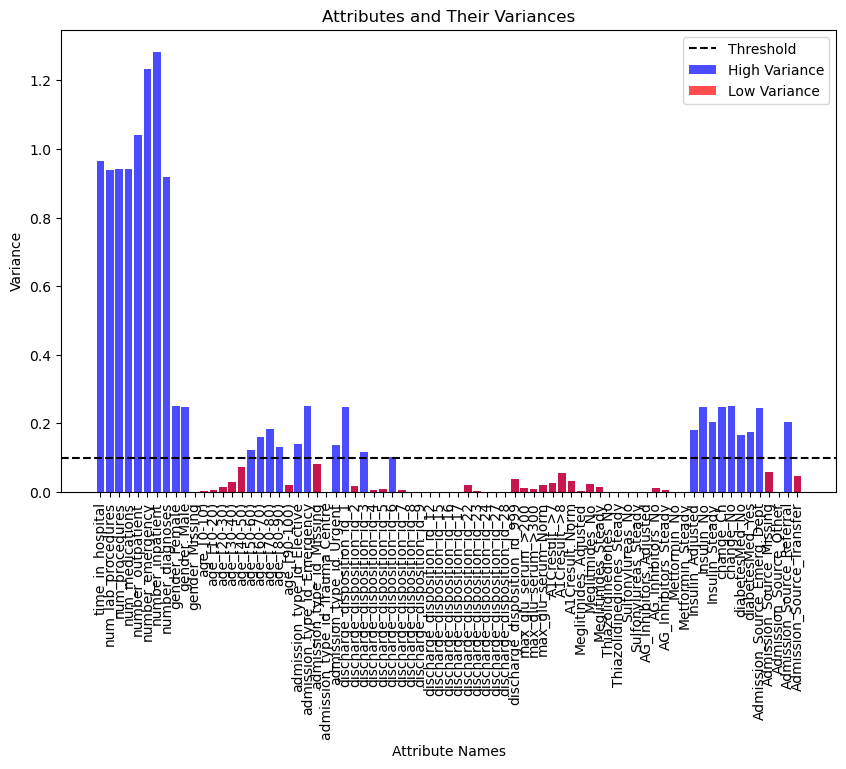

In [22]:
# Plot the variances of all of the attributes in blue
plt.figure(figsize = (10,6))
plt.bar(range(len(feature_names)), selector.variances_, color = 'blue', alpha = 0.7, label = 'High Variance')

# Show the low variance features in red
low_variance_indices = [i for i in range(len(feature_names)) if i not in selected_features_indices]
plt.bar(low_variance_indices, selector.variances_[low_variance_indices], color = 'red', alpha = 0.7, label = 'Low Variance')

plt.axhline(y=0.1, color = 'black', linestyle = '--', label = 'Threshold')
plt.xticks(range(len(feature_names)), feature_names, rotation = 'vertical')
plt.xlabel('Attribute Names')
plt.ylabel('Variance')
plt.title('Attributes and Their Variances')
plt.legend()
plt.show

## Exporting Data to Next Step

In [23]:
# Export data to Model Building & Evaluation Notebook

# If using Feature Importance from a Tree-Based Model, use this cell
X_train_LowVariance.to_csv('Mod_3_X_train_LVar.csv', index = False)
X_test_LowVariance.to_csv('Mod_3_X_test_LVar.csv', index = False)
Y_train_resampled.to_csv('Mod_3_Y_LVar.csv', index = False)
Y_test.to_csv('Mod_3_Y_test_LVar.csv', index = False)

In [24]:
X_train_LowVariance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125919 entries, 0 to 125918
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   time_in_hospital             125919 non-null  float64
 1   num_lab_procedures           125919 non-null  float64
 2   num_procedures               125919 non-null  float64
 3   num_medications              125919 non-null  float64
 4   number_outpatient            125919 non-null  float64
 5   number_emergency             125919 non-null  float64
 6   number_inpatient             125919 non-null  float64
 7   number_diagnoses             125919 non-null  float64
 8   gender_Female                125919 non-null  int32  
 9   gender_Male                  125919 non-null  int32  
 10  age_[50-60)                  125919 non-null  int32  
 11  age_[60-70)                  125919 non-null  int32  
 12  age_[70-80)                  125919 non-null  int32  
 13 